## <i><u><b> "Mechanisms of sexual preference in populations with advantage to the heterozygote" supervised by Manon COSTA </b></u></i> ##

<b><u>Project summary:</u></b> The mechanisms of mate choice in sexually reproducing populations are very diverse. An important question is to understand how such mechanisms can arise in natural populations and what is their role in maintaining phenotypic diversity in communities. In this internship we will focus on the case of a polymorphic population under natural selection that favors the survival of heterozygotes. We will first assume that reproduction is uniformly random in the population and we will study the possible equilibria for the dynamics. In a second step, we will introduce mutant populations for which the choice of partner is done through self-referencing. We will investigate under which conditions such a mutant can survive in the population and what impact it will have on the phenotypic composition of the population. This training course will use the notions of dynamic systems and a numerical part will be developed as well.
***

### <u><b> Population model with advantage to hererozygotes </b></u> ###

We are interested in a population of individuals characterized by an allele on a gene that influences reproduction. More precisely, we assume that there are $ A_{1}, A_{2}, ..., A_{m} $  different possible alleles. We will note $ Z_{A_{i}} $ the size of the population carrying the allele $ A_{i} $.

We assume that all individuals (regardless of their allele) have a natural mortality $ d > 0 $ and that they are in logistic competition with each other. The parameter $ c > 0 $ gives the intensity of this competition.

For the reproduction, we model in the following way.
- We begin by choosing an individual in the population that has genotype $ A_{i} $.
- This individual chooses uniformly at random a partner: it is of type $ A_{j} $ with a probability equal to the frequency of this type in the population $ \frac{Z_{A}}{z}\\ $ where $ z = \sum_{k=1}^{m} Z_{A_{k}} $.
- The success of such a reproduction is then $ b(1 + s_{ij} ) $.
We will assume $ b > d, s_{ii} = 0 , \text{ and } s_{ij} = s_{ji} > 0 \text{ for } i \neq j $.

#### <u><b> 1. Theoretical study of the two allele case </b></u> ####

In the case where there are two alleles in the population $ A_{1} $ and $ A_{2} $ the reproduction mechanism is therefore :

$$
A_{1} \times A_{1} \rightarrow b \\
A_{2} \times A_{2} \rightarrow b \\
A_{1} \times A_{2} \rightarrow b(1+s)
$$

The dynamical system that describes the evolution of the population sizes $ (Z_{A_{1}}, Z_{A_{2}}) $ is :

$
\begin{equation}
\left\{
\begin{aligned}
  \frac{d}{dt} Z_{A_{1}}(t) = Z_{A_{1}}(t)(b + \frac{bs}{z(t)} Z_{A_{2}}(t) -d -cz)
  \\       
  \frac{d}{dt} Z_{A_{2}}(t) = Z_{A_{2}}(t)(b + \frac{bs}{z(t)} Z_{A_{1}}(t) -d -cz)
\end{aligned}
\right.
\end{equation}
$

where $ z(t) = Z_{A_{1}}(t) + Z_{A_{2}}(t) $


<u>**Lemma 1.1**</u>
 <i> Suppose that $ s > 0 $ then this dynamical system (1) has :
- three unstable equilibria $ (0, 0) $, $ (0, \frac{b-d}{c}) $ and $ (\frac{b - d}{c}, 0) $
- one locally stable balance $ Z_{A_{1}}^{*} = Z_{A_{2}}^{*} = \frac{b + bs/2 - d}{2c} $

Moreover, all trajectories starting from positive coordinates converge to this equilibrium </i>

In [1]:
import pylab as pl
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import scipy.stats as stats
from random import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import L3_Internship_functions as lf

<ipython-input-19-1c6a7372e929>:13: RuntimeWarning: divide by zero encountered in true_divide
  y[0]*(b+((b*s)/(y[0]+y[1]))*y[1]-d-c*(y[0]+y[1])),
<ipython-input-19-1c6a7372e929>:13: RuntimeWarning: invalid value encountered in multiply
  y[0]*(b+((b*s)/(y[0]+y[1]))*y[1]-d-c*(y[0]+y[1])),
<ipython-input-19-1c6a7372e929>:14: RuntimeWarning: divide by zero encountered in true_divide
  y[1]*(b+((b*s)/(y[0]+y[1]))*y[0]-d-c*(y[0]+y[1]))
<ipython-input-19-1c6a7372e929>:14: RuntimeWarning: invalid value encountered in multiply
  y[1]*(b+((b*s)/(y[0]+y[1]))*y[0]-d-c*(y[0]+y[1]))


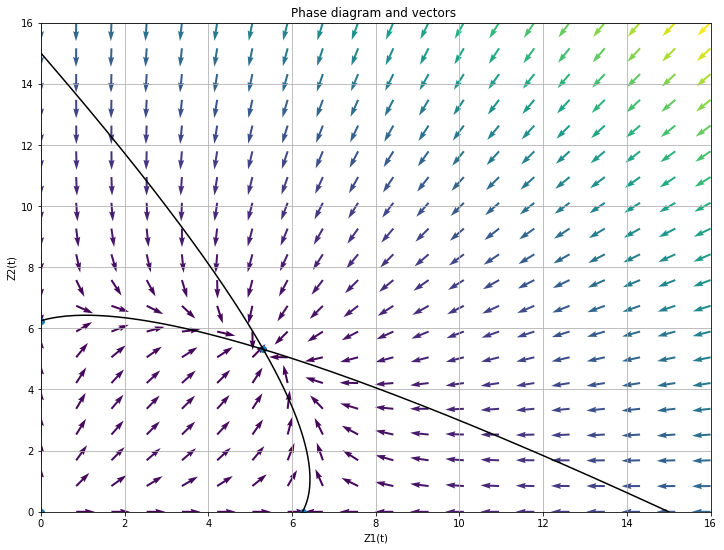

In [19]:
def phase_diagram_and_vectors( precision, param, axis):
    '''
    This function plots the phase diagram of the two population system with the associated vector field, equilibria and isoclines.
    input1: An int for the number of x-axis points.
    input2: Parameters of the associated system in a list.
    input3: A list of 4 number representing the axis size.
    output: A phase diagram with vector field in a matplotlib figure.
    '''

    def func(y, t, param) : # The function associated with the system
        b, s , d, c = param
        res = [
            y[0]*(b+((b*s)/(y[0]+y[1]))*y[1]-d-c*(y[0]+y[1])),
            y[1]*(b+((b*s)/(y[0]+y[1]))*y[0]-d-c*(y[0]+y[1]))
        ]
        return np.array(res)
    
    b, s , d, c = param

    # Creation of isoclines and equilibrium points
    X = [k/10 for k in range(0, precision+1)]
    y2 = [((b-d+np.sqrt(((d-b)**2)+4*c*b*s*k/10))/(2*c)) - k/10 for k in range(0,precision+1)]
    
    # Couples (x,y) of equilibrium points
    a, i = (b + (b*s/2) - d)/ (2*c), (b-d)/c
    P1, P2 = [0, 0, a, i], [0, i, a, 0]   

    plt.figure(figsize=(12,9))
    plt.grid()

    # Creation of a vector field
    x = np.linspace(axis[0], axis[1], 20)
    y = np.linspace(axis[2], axis[3], 20)
    X1 ,Y1 = pl.meshgrid(x, y)
    DX1, DY1 = func([X1 ,Y1], X, param)
    M = (pl.hypot(DX1, DY1))
    M[M==0] = 1.
    DX1 /= M
    DY1 /= M

    # Vector display
    plt.quiver(X1 , Y1 ,DX1,DY1,M)

    # Display of isoclines and equilibrium points
    plt.plot(X, y2, 'k')
    plt.plot(y2, X, 'k')
    plt.scatter(P1,P2)

    # Title, caption and axes
    plt.title("Phase diagram and vectors ", color='k')
    plt.xlabel("Z1(t)", color='k')
    plt.ylabel("Z2(t)", color='k')
    plt.axis(axis)   

    plt.show()

phase_diagram_and_vectors(150, [10.0, 0.7, 5.0, 0.8], [0,16,0,16])

`We can see the 4 equilibria and that all trajectories converge towards central equilibrium.`<br>
`It means that the non-zero population will coexist no matter what.`

#### <u><b> 2. Three allele case </b></u> ####

Now suppose that there are three alleles $ A_{1} $, $ A_{2} $ and $ A_{3} $ in the population. In this case, the selection mechanism is described by the triple $ (s_{12}, s_{13}, s_{23}) $.<br>
The dynamics of $ (z_{A_{1}}, z_{A_{2}}, z_{A_{3}}) $ is given by :

$
\begin{equation}
\left\{
\begin{aligned}
  & z_{A_{1}}^{.} = z_{A_{1}} ( b ( 1 + s_{12} \frac{z_{A_{2}}}{z} + s_{13} \frac{z_{A_{3}}}{z}) -d -cz)
  \\       
  & z_{A_{2}}^{.} = z_{A_{2}} ( b ( 1 + s_{12} \frac{z_{A_{1}}}{z} + s_{23} \frac{z_{A_{3}}}{z}) -d -cz)   
  \\
  & z_{A_{3}}^{.} = z_{A_{3}} ( b ( 1 + s_{13} \frac{z_{A_{1}}}{z} + s_{23} \frac{z_{A_{2}}}{z}) -d -cz)
\end{aligned} \tag{2}
\right.
\end{equation}
$

with $ z_{A_{1}} + z_{A_{2}} + z_{A_{3}} = z $.

<b>Existence of an equilibrium of coexistence of the three types :</b> The result below gives conditions for the existence of an equilibrium of coexistence of the three types. Let's start with some notations

$$ M = \begin{pmatrix} 0 & s_{12} & s_{13}\\ s_{12} & 0 & s_{23}\\ s_{13} & s_{23} & 0 \end{pmatrix} \text{ and } \ 1 = \begin{pmatrix} 1\\ 1\\ 1 \end{pmatrix} $$
We note that $ \ det(M) = 2_{s_{12}s_{13}s_{23}} \neq 0 \ $ under our hypothesis.

<b> Proposition 1.1 : </b><i> The system $ (2) $ admits a strictly positive equilibrium if and only if $ M^{-1}1 $ is strictly positive, which is equivalent to
$$ \begin{equation} s_{12} < s_{13} + s_{23},\quad s_{13} < s_{12} + s_{23},\quad s_{23} < s_{12} + s_{13} \end{equation} \tag{3} $$
In this case the equilibrium is :

$$
\begin{pmatrix}
Z_{1}^{*}\\
Z_{2}^{*}\\
Z_{3}^{*}
\end{pmatrix}
= \frac{z^{*}}{1^{T}M^{-1}1} = \frac{z^{*}}{1^{T}M^{-1}1}
\begin{pmatrix}
s_{23}(s_{12} + s_{13} - s_{23}) \\
s_{13}(s_{12} + s_{23} - s_{13}) \\
s_{12}(s_{13} + s_{23} - s_{12})
\end{pmatrix}
$$

with
$$ z^{*} = \frac{1}{c} ( b - d + \frac{2bs_{12}s_{13}s_{23}}{1^{T}M^{-1}1}) $$

and it is globally stable.

Note that in this case
$$ 1^{T}M^{-1}1 = \sum_{(1,j,k)\in{1,2,3}^{3}} s_{ij}(s_{ik} + s_{jk} - s_{ij}) $$
</i>

#### <u><b> 3. The general case with k alleles </b></u> ####

In the general case, we can also study the existence of a positive equilibrium and it is always based on the selection matrix M.<br>
The system is written as follows :

$
\begin{equation}
\left\{
\begin{aligned}
  & z_{A_{i}}^{.} = z_{A_{i}} ( b [ 1 +  \frac{\sum_{j \neq i}^{k} s_{ij} z_{A_{j}}}{z} - d - cz] ), \forall i \in \{1,...,k\},
  \\  
  & z = \sum_{i=1}^{k} z_{A_{i}}
\end{aligned} \tag{5}
\right.
\end{equation}
$

with the symetry $$ s_{ij} = s_{ji} \quad ,\quad \forall i \neq j $$

<b> Existence of positive equilibria :</b> First, we are searching for equilibria with all positive coordinates. Equilibria with at least a zero coordinate can be found by induction. As in the case of 3 alleles, we use the following notation :

$$
M = 
\begin{pmatrix}
0 & s_{12} & s_{13} & ... & s_{1k} \\
s_{12} & 0 & s_{23} & ... & s_{2k} \\
... & ... & ... & ... & ... \\
s_{1k} & s_{2k} & ... & s_{k-1, k} & 0

\end{pmatrix} \tag{6}
and \ 1 = \begin{pmatrix} 1\\ 1\\ 1 \end{pmatrix}
$$

<b> Proposition 1.2 : </b> If $ det(M) \neq 0 $, the system admits a positive equilibrium if and only if each coordinate of $M^{−1}$<b>1</b> is strictly positive. <br>
In this case, the equilibrium is unique and is given by :

$$
Z^{*} = \frac{1}{c1^{T}M^{-1}1} ( b + \frac{b}{1^{T}M^{-1}1} -d ) M^{-1}1.
\tag{7}
$$

If $ det(M) = 0 $ , depending on the values of M, the system may have no equilibrium or an affine space of equilibria restricted to the cone of positive coordinates, whose dimension is the dimension of the kernel of M.

#### <u><b>4. Numerical exploration </b></u> ####

One of the objectives of the internship is to understand how such a community is structured. In particular, if we imagine that the gene is subject to a little mutation, new alleles will appear successively in the community. These alleles can either disappear immediately if they are disadvantaged, or settle and disturb the pre-existing equilibrium.

Several tracks will be studied :

- If the conditions for the coexistence of 2 or 3 types are explicit, those for the coexistence of 4 are not. We can test how the appearance of a fourth type in a community with three types destabilizes the existing one.

- The objective here is to develop a mutation model on the alleles associated with a model for the calculation of selection coefficients sij and to simulate the community to visualize how many types coexist over time and what is the structure of the alleles.

##### <u><b>4.1. Numerical study of the dynamic system with three stable populations and addition of a mutant with variable affinities. </b></u> #####
`Now, we will see what happens if a new population joins the group with different affinities to the others`

$
\begin{equation}
\left\{
\begin{aligned}
  & z_{A_{1}}^{.} = z_{A_{1}} ( b ( 1 + s \frac{z_{A_{2}}}{z} + s \frac{z_{A_{3}}}{z} + \alpha \frac{z_{A_{4}}}{z}) -d -cz)
  \\       
  & z_{A_{2}}^{.} = z_{A_{2}} ( b ( 1 + s \frac{z_{A_{1}}}{z} + s \frac{z_{A_{3}}}{z} + \beta \frac{z_{A_{4}}}{z}) -d -cz)   
  \\
  & z_{A_{3}}^{.} = z_{A_{3}} ( b ( 1 + s \frac{z_{A_{1}}}{z} + s \frac{z_{A_{2}}}{z} + \gamma \frac{z_{A_{4}}}{z}) -d -cz)
  \\
  & z_{A_{4}}^{.} = z_{A_{4}} ( b ( 1 + \alpha \frac{z_{A_{1}}}{z} + \beta \frac{z_{A_{2}}}{z} + \gamma \frac{z_{A_{3}}}{z}) -d -cz)
  \\
  & \quad\quad\quad\quad z = z_{A_{1}} + z_{A_{2}} + z_{A_{3}} + z_{A_{4}}
\end{aligned} \tag{4}
\right.
\end{equation}
$

In [3]:
# process time : 1 min 31,7 sec

def Z3pop1mut(Z, t, param) : # The function associated with the system
    b, s, c, d, alpha, beta, gamma = param
    z = sum(Z)
    res = [
        Z[0]*(b + b*((s*Z[1]/z) + (s*Z[2]/z) + (alpha*Z[3]/z)) -d -c*z),
        Z[1]*(b + b*((s*Z[0]/z) + (s*Z[2]/z) + (beta*Z[3]/z)) -d -c*z),
        Z[2]*(b + b*((s*Z[0]/z) + (s*Z[1]/z) + (gamma*Z[3]/z)) -d -c*z),
        Z[3]*(b + b*((alpha*Z[0]/z)+(beta*Z[1]/z)+(gamma*Z[2]/z)) -d - c*z)    
    ]
    return res

#VARIABLES AND PARAMETERS OF THE SYSTEM
do_we_need_to_execute = False
if do_we_need_to_execute :
    nb = (1,7,75)   # Number of points on the x-axis and y-axis
    intervalle, intervalle_gamma, t = np.linspace(nb[0],nb[1],nb[2]), [1.0, 2.0, 3.0, 4.0], np.arange(0.0,10.0,0.01) # Time interval and time step for the integration of the system of ODEs

    b, s , d, c = 2, 1, 1, 1 # Parameters of the system
    seuil = 0.001 # Threshold
    y0 = [1.0,1.0,1.0,10] # Initial values of the system


    #DATA PROCESSING
    result = [] # List of the results of the integration of the system of ODEs
    for gamma in intervalle_gamma : # Loop on the values of gamma
        g_result = []
        for alpha in intervalle:    # Loop on the values of alpha
            for beta in intervalle:         # Loop on the values of beta     
                arg = (b, s, c, d, alpha, beta, gamma)
                y = odeint(Z3pop1mut, y0, t, args=(arg,))
                g_result.append([y[-1],(alpha,beta)])   # Add the result of the integration of the system of ODEs to the list
        result.append(g_result) # Add the list of the results of the integration of the system of ODEs to the list

    #RETRIEVING THE POINTS
    points = [[[[] for i in range(2)] for j in range(len(y[-1]))] for h in range(len(intervalle_gamma))] 
    for gam in range(len(result)): 
        for k in range(len(result[gam])) :  
            for pop in range(len(result[gam][k][0])):
                if result[gam][k][0][pop] < seuil: # If the population is below the threshold 
                    points[gam][pop][0].append(result[gam][k][1][0]) # Add the value of alpha to the list of the x-axis points
                    points[gam][pop][1].append(result[gam][k][1][1]) # Add the value of beta to the list of the y-axis points

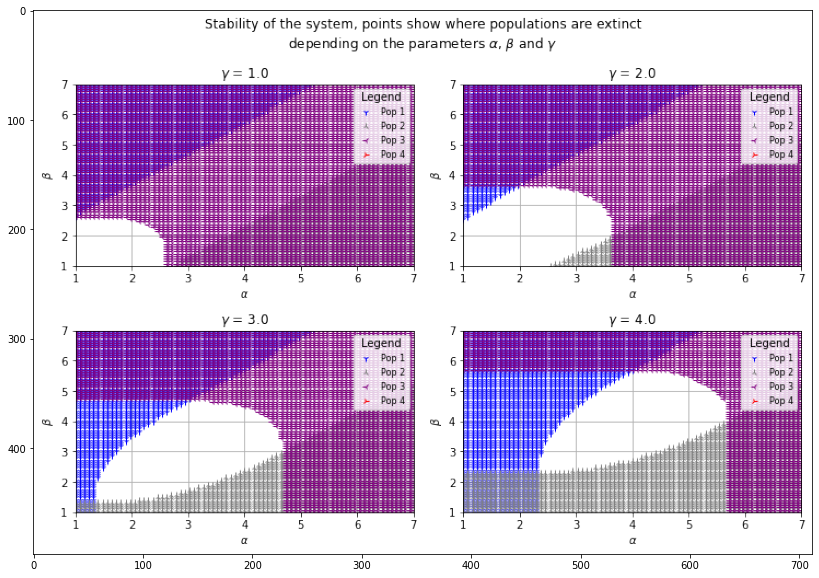

In [4]:
if do_we_need_to_execute :
    #GRAPHIC DISPLAY
    marqueurs = ['1','2','3','4'] # Markers
    colors = ['blue','grey','purple','red'] # Colors

    fig = plt.figure( figsize=(10, 7) ) 
    fig.suptitle("Stability of the system, points show where populations are extinct\ndepending on the parameters" + r" $\alpha$, $\beta$ and $\gamma$") 

    for gam in range(len(points)): 
        plt.subplot(2,2,gam+1)
        for pop in range(len(points[gam])):
            plt.plot(points[gam][pop][0], points[gam][pop][1], marqueurs[pop], color=colors[pop], label="Pop "+str(pop+1))
        plt.title(r'$\gamma$ = '+str(intervalle_gamma[gam]))
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$\beta$')
        plt.xlim(nb[0],nb[1])
        plt.ylim(nb[0],nb[1])
        plt.grid(True)
        plt.legend( loc='upper right', ncol=1, fontsize=8, title='Legend', title_fontsize=10)

    plt.tight_layout()
    plt.show()
else :
    plt.figure(figsize=(20, 10))
    imgplot = plt.imshow(mpimg.imread('3pop.png'))
    plt.show()

`We can notice that ` $ \alpha $ `,` $ \beta $ `and` $ \gamma $ `must have close values in order to maintain the balance and keep all populations alive.`
`It means that if one population as a better affinity to the others, it will take over the others and will vanish.`

`The compilation of these graphs allows to highlight a zone, a set of values for the different affinities values where there is coexistence of all the populations and no zone where they all disappear. Thus the destabilization of the system which induces the disappearance of one or two types, inevitably ends up restabilizing it.`

##### <u><b>4.2. Numerical study of the dynamic system with n populations. </b></u> #####
##### <u><b>4.2.1 Simulation of adding a single mutant. </b></u> #####

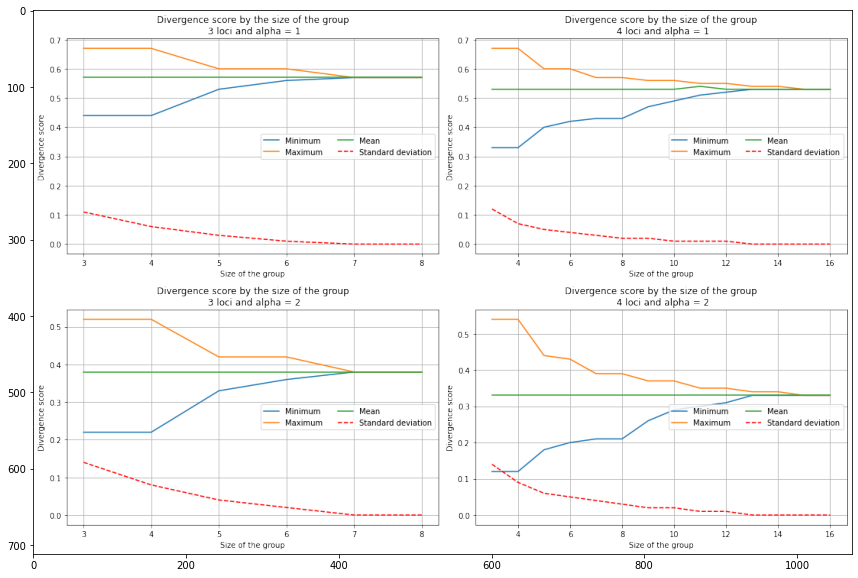

In [5]:
# process time : 30,1 sec

def div_plot(q : int , alpha : float): # Function that plots the divergence of the system
    '''
    Input : q is an integer between 1 and 4, alpha is a float
    Output : A plot of the divergence of the system
    '''    
    if q < 5 :
        if q < 3 :
            x = range(q, 2**q+1) # Range of the number of sequences
        else :
            x = range(3, 2**q+1) # Range of the number of sequences
        list_genome = lf.AleaGen(q) # List of all the possible combinations of q bits
        list_comb = [lf.combinliste(list_genome, k) for k in x]  # List of all the possible combinations of q bits
        
        score_tot = [[lf.div_score(j, alpha) for j in i] for i in list_comb]  # List of the divergence of the system for each combination of sequences

        plt.title(f'Divergence score by the size of the group\n {q} loci and alpha = {alpha}')
        plt.plot( x, [np.min(k) for k in score_tot], label='Minimum')
        plt.plot( x, [np.max(k) for k in score_tot], label='Maximum')
        plt.plot( x, [np.round(np.mean(k),2) for k in score_tot], label='Mean')
        plt.plot( x, [np.round(np.std(k),2) for k in score_tot], color= 'r', label='Standard deviation', linestyle='--')
        plt.xlabel('Size of the group')
        plt.ylabel('Divergence score')
        plt.legend( loc='center right', ncol=2, fontsize=10)
        plt.grid()


do_we_need_to_execute = False #
if do_we_need_to_execute :
# Tests
    plt.figure(figsize=(15, 10))
    plt.subplot(2,2,1)
    div_plot(3, 1) # Plot the divergence of the system for sequences with 3 loci and alpha = 1
    plt.subplot(2,2,2)
    div_plot(4, 1) # Plot the divergence of the system for sequences with a different number of loci : 4 and alpha = 1
    plt.subplot(2,2,3)
    div_plot(3, 2) # Plot the divergence of the system for sequences with 3 loci and alpha = 1
    plt.subplot(2,2,4)
    div_plot(4, 2) # Plot the divergence of the system for sequences with 4 loci and a different : alpha = 2

    plt.tight_layout()
    plt.show()
else :
    plt.figure(figsize=(20, 10))
    imgplot = plt.imshow(mpimg.imread('div_score.png'))
    plt.show()

`This result was expected as the result of the central limit theorem. Indeed, the more the number of individuals is important, the more the distribution of the number of individuals of each type will be close to a normal distribution.`

`Ok but what happens if we add a mutant ? As we saw in these graphics, big populations are more stable than small ones. Does the mutant have a bigger chance to survive if the population is big ?`

`In order to keep a time of simulation reasonable, we will only study the case where there is only 4 locus.`

In [6]:
# Data creation
# Execute only if you don't have the csv files (it takes a long time : 175mins)
def mutant_stability(loci_number, groupe_size, seuil, params):
    '''
    Input : groupe_size is an integer, loci_number is an integer, treshold is a float, params is a tuple of 3 floats for b, d and c
    Output : A dataframe with the stability of the system for each combination of sequences
    '''

    list_genome = lf.AleaGen(loci_number) # List of all the possible combinations of loci_number bits
    list_comb = lf.combinliste(list_genome, groupe_size) # List of all the possible combinations of groupe_size sequences

    y0 = [1.0 for k in range(groupe_size)] # Initial conditions
    t = np.linspace(0, 100, 1000) # Time interval
    seuil = 0.01
    df = pd.DataFrame(columns = [f"{k}" for k in range(len(list_genome))])

    for i in list_comb : # Loop on the combinations
        
        y = odeint(lf.Za, y0, t, args=(i, params,))[-1] # Solve the system
        if len(np.where(y > seuil)[0]) != len(y) : # If the population is below the threshold
            continue
        else :
            print(f"{list_comb.index(i)}/{len(list_comb)}") 
            Y0 = y0 + [seuil] # Initial conditions
            df.loc[list_comb.index(i)] = [list(odeint(lf.Za, Y0, t, args=(i + [j], params,))[-1]) + list(lf.div_mutant(i, j)) for j in list_genome] # Solve the system and add the result to the dataframe
    
    df.to_csv(f"mutant_stability_{loci_number}_loci_{groupe_size}_size_group.csv") # Save the dataframe
    return df

# Tests
do_we_need_to_create_the_data = False # Change to True if you want to create the data

if do_we_need_to_create_the_data :
    mutant_stability(3, 3, 0.01, (2, 1, 1, 1)) # Create a dataframe with the stability of the system for sequences with 3 loci and a group of 5 sequences
    mutant_stability(3, 6, 0.01, (2, 1, 1, 1)) # Create a dataframe with the stability of the system for sequences with 3 loci and a group of 11 sequences
    mutant_stability(4, 5, 0.01, (2, 1, 1, 1)) # Create a dataframe with the stability of the system for sequences with 4 loci and a group of 5 sequences
    mutant_stability(4, 11, 0.01, (2, 1, 1, 1)) # Create a dataframe with the stability of the system for sequences with 4 loci and a group of 11 sequences

In [7]:
#Now that we have the csv files, we can load them and plot the results
#I wrote them in str format because it was easier to store them in the csv files
#So we have to convert them to float

df = pd.read_csv("mutant_stability_4_loci_5_size_group.csv", index_col=0) # Read the dataframe
for i in range(len(df.columns)) :
    df.iloc[:,i] = [lf.recup_data(df.iloc[k,i][1:-1]) for k in range(len(df))] # Convert the data in the dataframe to a list

In [8]:
# process time : 3 mins 1.1 sec

#We check if every mutant has the same comportment as the others with student t-test
do_we_need_to_test_it = False # Change to True if you want to test the data

if do_we_need_to_test_it :
    score = []
    for i in range(len(df.columns)) :
        for j in range(i+1,len(df.columns)) :
            if i != j :
                #t test between mutant i and mutant j for mean_divergence and max_divergence
                t1, p1 = stats.ttest_ind([list(df.iloc[:,i])[k][-2] for k in range(len(df))], [list(df.iloc[:,j])[k][-2] for k in range(len(df))])
                t2, p2 = stats.ttest_ind([list(df.iloc[:,i])[k][-1] for k in range(len(df))], [list(df.iloc[:,j])[k][-1] for k in range(len(df))])
                score.append([(t1, p1), (t2, p2)])
    print(score)
#We can see that the mean_divergence and max_divergence are the same for every mutant
#So now we can merge all mutants as one group and plot the results

`Let's fix the treshold of extinction's population`

`We can now treat the data, e want to know the number of mutants that are stable and see if there is a correlation between the stability and the divergence `

In [9]:
# process time : 1 min

seuil = 0.0001 # Threshold

df_point = pd.DataFrame(columns = ["survival","mean_div","max_div"]) # Create a new dataframe
for i in range(len(df.columns)) : # Loop on the columns
    for j in range(len(df)) : # Loop on the dataframe
        if len(np.where(np.asarray(df.iloc[j,i][:-2]) >= seuil)[0]) != len(df.iloc[j,i][:-2]) : # If the population is below the threshold
            df_point.loc[i*len(df) + j] = [0, df.iloc[j,i][-2], df.iloc[j,i][-1]] # If the population is below the threshold, add 0 to the dataframe
        else :
            df_point.loc[i*len(df) + j] = [1, df.iloc[j,i][-2], df.iloc[j,i][-1]] # If the population is above the threshold, add 1 to the dataframe

`To plot the results we need to separate the data in two groups : the stable mutants and the unstable mutants.`

`There is several points with the same cople of values so we need to quantify them.`

In [10]:
df_survival = df_point[df_point["survival"] == 1] # Create a dataframe with only the stable mutants
df_death = df_point[df_point["survival"] == 0] # Create a dataframe with only the unstable mutants

dic_survival = {} # Create a dictionary with the number of mutants that are stable for each divergence
for i in range(len(df_survival)) : 
    if f"{df_survival.iloc[i,1]} {df_survival.iloc[i,2]}" not in dic_survival : # If the divergence is not in the dictionary
        dic_survival[f"{df_survival.iloc[i,1]} {df_survival.iloc[i,2]}"] = 1 # Add it to the dictionary with a value of 1
    else :
        dic_survival[f"{df_survival.iloc[i,1]} {df_survival.iloc[i,2]}"] += 1 # Else add 1 to the value

dic_death = {}
for i in range(len(df_death)) :
    if f"{df_death.iloc[i,1]} {df_death.iloc[i,2]}" not in dic_death :
        dic_death[f"{df_death.iloc[i,1]} {df_death.iloc[i,2]}"] = 1
    else :
        dic_death[f"{df_death.iloc[i,1]} {df_death.iloc[i,2]}"] += 1

`Now we can plot them in a scatter plot with the number of mutants with the same values as the size of the points`

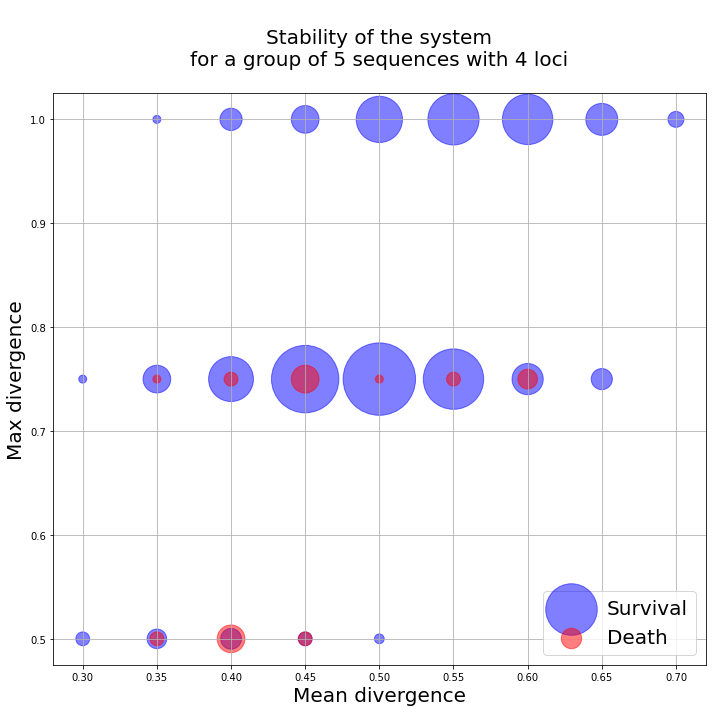

In [11]:
plt.figure(figsize=(10,10))
plt.scatter([float(k.split(" ")[0]) for k in dic_survival.keys()], [float(k.split(" ")[1]) for k in dic_survival.keys()], c = "blue", s = [dic_survival[k] for k in dic_survival.keys()], alpha= 0.5, label = "Survival")
plt.scatter([float(k.split(" ")[0]) for k in dic_death.keys()], [float(k.split(" ")[1]) for k in dic_death.keys()], c = "red", s = [dic_death[k] for k in dic_death.keys()], alpha= 0.5, label = "Death")
plt.xlabel("Mean divergence", fontsize=20)
plt.ylabel("Max divergence", fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.grid()
plt.title("\nStability of the system\nfor a group of 5 sequences with 4 loci\n", fontsize=20)
plt.tight_layout()
plt.show()

`We can see that the more they diverge from the group the higher is their chance to survive. This exactly what we expected, the model is made to be stable and the more the mutant is different from the group, the more it has a chance to survive.`

`We will make the last simulation : we will pick random groups and add all different missing populations one by one until they all coexist and see if it converge to an equilibrium where all populations coexist or if the system is unstable and the populations vanish and the system never converge.`

In [12]:
#Let's plot a graphics sumarizing the simulation before data analysis
def all_mutant_for_graph(loci_number : int, group_size : int, treshold : float, params : tuple, t):
    '''
    Input : loci_number is the number of loci, group_size is the number of individuals in the group, treshold is the treshold of the selection, params is a tuple containing the parameters of the model, t is the time of the simulation
    Output : A dataframe with all the populations of the group at each time
    '''
    list_genome = lf.AleaGen(loci_number) # List of all the possible combinations of loci_number bits
    list_comb = lf.combinliste(list_genome, group_size) # List of all the possible combinations of groupe_size sequences

    population = choice(list_comb) # Initial population
    y0 = [0.0 if genome not in population else 1.0 for genome in list_genome] # Initial conditions
    y = odeint(lf.Za, y0, t, args=(list_genome, params,)) # Solve the system

    if len(np.where(y[-1] > treshold)[0]) != group_size : # If the group is unstable, retry
        return all_mutant_for_graph(loci_number, group_size, treshold, params, t)

    else :
        iteration = 1 # Number of iterations
        df_sim = pd.DataFrame(y, columns=[str(k) for k in list_genome], index=t) # Create a dataframe with the populations at each time step
        y1 = y # Initial conditions for the next iteration
        while len(np.where(y1[-1] > treshold)[0]) < len(y1[-1]) and iteration < 50: # While all populations don't all coexist and the number of iterations is less than 50
            iteration += 1 # Add 1 to the number of iterations

            missing = [list_genome[i] for i in np.where(y1[-1] <= treshold)[0]] # List of the missing populations
            mutant = choice([i for i in missing]) # Choose a random missing population

            y0 = np.where(y1[-1] < treshold, 0, y1[-1]) # Initial conditions for the next iteration
            y0[list_genome.index(mutant)] = treshold*10 # Add the mutant to the initial conditions

            y1 = odeint(lf.Za, y0, t, args=(list_genome, params,)) # Solve the system

            # Concatenate the dataframes
            df_sim = pd.concat([df_sim, pd.DataFrame(y1, columns=[str(k) for k in list_genome], index = np.linspace(max(t)*iteration, max(t)*(iteration+1), len(t)))], axis=0)
    
    return df_sim # Return the dataframe

df_sim_1 = all_mutant_for_graph(loci_number= 4, group_size= 6, treshold= 0.0001, params= (2, 0, 1, 0.5), t= np.linspace(0, 200, 1000))
df_sim_2 = all_mutant_for_graph(loci_number= 4, group_size= 6, treshold= 0.0001, params= (2, 0, 1, 1), t= np.linspace(0, 200, 1000))

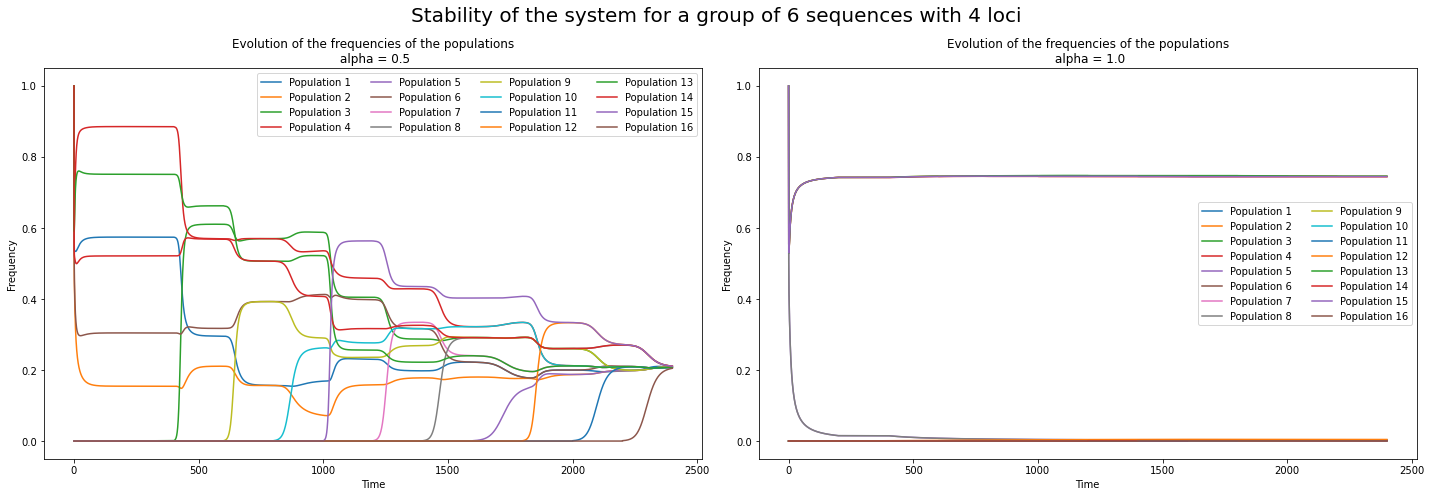

In [13]:
plt.figure(figsize=(20, 7))
plt.suptitle("Stability of the system for a group of 6 sequences with 4 loci", fontsize=20)

plt.subplot(121) 
for k in range(len(df_sim_1.columns)) :
    plt.plot(df_sim_1.iloc[:, k], label='Population '+str(k+1))
plt.legend(loc='upper right', ncol=4, fontsize=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Evolution of the frequencies of the populations\n alpha = 0.5')

plt.subplot(122) 
for k in range(len(df_sim_2.columns)) :
    plt.plot(df_sim_2.iloc[:, k], label='Population '+str(k+1))
plt.legend(loc='center right', ncol=2, fontsize=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Evolution of the frequencies of the populations\n alpha = 1.0')

plt.tight_layout()
plt.show()

`We can see that with an alpha value of 0..5 all populations can coexists and the system is stable.`

`That means that when we increase the divergence (alpha value) the system is more stable`

`This result is not surprising as the more the populations are different the more they are attracted to each other and the more they have a chance to coexist.`

In [14]:
# Execute only if you don't have the csv files (it takes a long time : something around 600mins)
def all_mutant(loci_number : int, group_size : int, treshold : float, params : tuple, t, iter_max : int):
    '''
    Input : loci_number is the number of loci, group_size is the number of individuals in the group, treshold is the treshold of the selection, params is a tuple containing the parameters of the model, t is the time of the simulation
    Output : A list of dataframes containing the populations of the system at each time step
    '''
    list_genome = lf.AleaGen(loci_number) # List of all the possible combinations of loci_number bits
    list_comb = lf.combinliste(list_genome, group_size) # List of all the possible combinations of groupe_size sequences

    df_stats = pd.DataFrame(columns = [ str(k) for k in range(iter_max)], index = [i for i in range(len(list_comb))])

    for population in list_comb : # Loop on the possible combinations of groupe_size sequences
        print(f"{list_comb.index(population)}/{len(list_comb)}")

        y0 = [0.0 if genome not in population else 1.0 for genome in list_genome] # Initial conditions
        y = odeint(lf.Za, y0, t, args=(list_genome, params,)) # Solve the system

        if len(np.where(y[-1] > treshold)[0]) != group_size : # If the group is unstable, skip it
            df_stats.loc[list_comb.index(population)] = [ np.nan for k in range(iter_max)]
            continue

        else :
            iteration = 1 # Number of iterations
            df_stats.iloc[list_comb.index(population), iteration - 1] = len(np.where(y[-1] > treshold)[0])
            y1 = y # Initial conditions for the next iteration
            while len(np.where(y1[-1] > treshold)[0]) < len(y1[-1]) and iteration < iter_max: # While all populations don't all coexist and the number of iterations is less than 50
                iteration += 1 # Add 1 to the number of iterations

                missing = [list_genome[i] for i in np.where(y1[-1] <= treshold)[0]] # List of the missing populations
                mutant = choice([i for i in missing]) # Choose a random missing population

                y0 = np.where(y1[-1] <= treshold, 0, y1[-1]) # Initial conditions for the next iteration
                y0[list_genome.index(mutant)] = treshold*10 # Add the missing population to the initial conditions

                y1 = odeint(lf.Za, y0, t, args=(list_genome, params,)) # Solve the system
                df_stats.iloc[list_comb.index(population), iteration - 1] = len(np.where(y1[-1] > treshold)[0])  # Add the number of coexisting populations to the dataframe

    df_stats.to_csv(f"df_stats_{loci_number}_loci_{group_size}_size_group.csv") # Save the dataframe

    return df_stats # Return the dataframe

do_we_need_to_simulate = False

if do_we_need_to_simulate :
    df_stats = all_mutant(loci_number= 4, group_size= 6, treshold= 0.0001, params= (2, 1, 1, 0.7), t= np.linspace(0, 200, 1000), iter_max= 25)
else :
    df_stats = pd.read_csv("df_stats_4_loci_6_group_size.csv", index_col=0)

`Here we will draw the graph of the number of living populations that coexists until they vanish or reach the final equilibrium where they all coexist simultaneously.`

`Each simulation will be drawn with low opacity, meaning that traits that are not present in the simulation will be transparent and traits that are frequent will be opaque.`

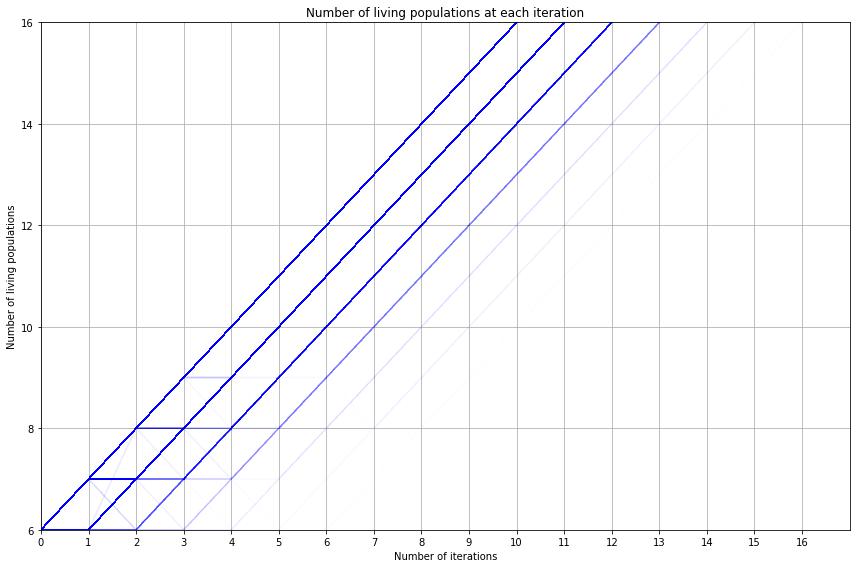

In [15]:
# process time : 9.1 seconds
df_plot_stats = lf.clear_data(df_stats)
plt.figure(figsize= (12, 8))
for k in range(len(df_plot_stats)):
    plt.plot(df_plot_stats.iloc[k], alpha= 0.01, color= "blue")

plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Number of living populations")
plt.title("Number of living populations at each iteration")
plt.xlim(0, len(df_plot_stats.columns))
plt.ylim(df_plot_stats.iloc[:,0].min(), df_plot_stats.iloc[:,-1].max())

plt.tight_layout()
plt.show()

`We can make two observations here :`

`- The bigger the populations get the more they are stable.`

`- At some point they can all coexist and the system is stable.`	